In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from urllib.request import Request,urlopen

### Elderly living alone

In [26]:
df_alone = pd.read_csv("/Users/erica/Desktop/Y3S2/DSE3101/DSE3101-HDB-Decode/data/living_alone.csv", skiprows=10) 

In [29]:
df_alone.rename(columns={df_alone.columns[0]: "Category"}, inplace=True)

In [40]:
df_living_alone = df_alone[df_alone["Category"].str.strip() == "Living Alone In Household"].head(1)

In [41]:
df_living_alone = df_living_alone.melt(id_vars=["Category"], var_name="Year", value_name="Count")

In [42]:
df_living_alone.set_index("Year", inplace=True)

Text(0.5, 1.0, 'Trend of People Living Alone in Household Over Time')

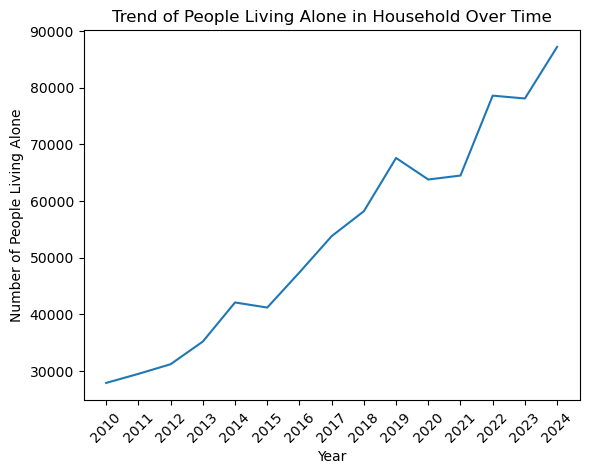

In [50]:
df_living_alone = df_living_alone.sort_index()
plt.plot(df_living_alone.index, df_living_alone['Count'])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of People Living Alone")
plt.title("Trend of People Living Alone in Household Over Time")

### Mode of Transportation by Residential Area

### Mode of Transporation by Residential Area

### Population of Students by Region

In [55]:
stugeo = pd.read_csv("../data/student_geo_popu.csv", skiprows=9).head(32)

In [57]:
stugeo = stugeo.iloc[1:, :]

In [58]:
stugeo

,Planning Area of Residence,Total,Pre-Primary,Primary,Secondary,Post-Secondary (Non-Tertiary),Polytechnic Diploma,Professional Qualification and Other Diploma,University,Unnamed: 9
1,Ang Mo Kio,24714.0,1857.0,8066.0,5628.0,2131.0,2832.0,527,3674.0,NaN
2,Bedok,43976.0,3290.0,14572.0,10517.0,3309.0,3923.0,580,7785.0,NaN
3,Bishan,15580.0,840.0,5012.0,3676.0,1431.0,1344.0,223,3056.0,NaN
4,Bukit Batok,27407.0,2077.0,8485.0,6604.0,2592.0,2686.0,500,4464.0,NaN
5,Bukit Merah,22195.0,1857.0,8530.0,4992.0,1739.0,1892.0,427,2758.0,NaN
6,Bukit Panjang,27475.0,1989.0,8761.0,6588.0,2292.0,3192.0,546,4108.0,NaN
7,Bukit Timah,17021.0,1232.0,5916.0,4125.0,1582.0,617.0,151,3398.0,NaN
8,Choa Chu Kang,38707.0,2487.0,11760.0,9140.0,3094.0,4839.0,705,6683.0,NaN
9,Clementi,15910.0,1246.0,5873.0,3671.0,1364.0,1202.0,272,2282.0,NaN
10,Downtown Core,253.0,29.0,61.0,59.0,25.0,18.0,-,60.0,NaN


In [59]:
stugeo = stugeo.iloc[:, :-1]

In [70]:
stugeo["young"] = stugeo["Pre-Primary"] + stugeo['Secondary'] + stugeo['Primary']
stugeo = stugeo.sort_values('young', ascending= False)

In [71]:
stugeo

,Planning Area of Residence,Total,Pre-Primary,Primary,Secondary,Post-Secondary (Non-Tertiary),Polytechnic Diploma,Professional Qualification and Other Diploma,University,young
24,Sengkang,53588.0,4974.0,21822.0,12968.0,2996.0,4996.0,648,5185.0,39764.0
14,Jurong West,51760.0,3732.0,17935.0,13221.0,4281.0,5928.0,830,5833.0,34888.0
29,Woodlands,49918.0,3201.0,15395.0,12621.0,4312.0,6934.0,1067,6388.0,31217.0
20,Punggol,37190.0,4921.0,16275.0,8685.0,1953.0,2699.0,356,2302.0,29881.0
2,Bedok,43976.0,3290.0,14572.0,10517.0,3309.0,3923.0,580,7785.0,28379.0
26,Tampines,43271.0,3312.0,13812.0,10165.0,3658.0,4835.0,584,6906.0,27289.0
30,Yishun,38377.0,3579.0,13373.0,9396.0,3328.0,3727.0,707,4268.0,26348.0
8,Choa Chu Kang,38707.0,2487.0,11760.0,9140.0,3094.0,4839.0,705,6683.0,23387.0
12,Hougang,36858.0,2349.0,11445.0,8843.0,3233.0,4216.0,714,6058.0,22637.0
6,Bukit Panjang,27475.0,1989.0,8761.0,6588.0,2292.0,3192.0,546,4108.0,17338.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '  Sengkang'),
  Text(1, 0, '  Jurong West'),
  Text(2, 0, '  Woodlands'),
  Text(3, 0, '  Punggol'),
  Text(4, 0, '  Bedok'),
  Text(5, 0, '  Tampines'),
  Text(6, 0, '  Yishun'),
  Text(7, 0, '  Choa Chu Kang'),
  Text(8, 0, '  Hougang'),
  Text(9, 0, '  Bukit Panjang'),
  Text(10, 0, '  Bukit Batok'),
  Text(11, 0, '  Pasir Ris'),
  Text(12, 0, '  Ang Mo Kio'),
  Text(13, 0, '  Bukit Merah'),
  Text(14, 0, '  Sembawang'),
  Text(15, 0, '  Toa Payoh'),
  Text(16, 0, '  Bukit Timah'),
  Text(17, 0, '  Serangoon'),
  Text(18, 0, '  Clementi'),
  Text(19, 0, '  Geylang'),
  Text(20, 0, '  Queenstown'),
  Text(21, 0, '  Kallang'),
  Text(22, 0, '  Bishan'),
  Text(23, 0, '  Jurong East'),
  Text(24, 0, '  Novena'),
  Text(25, 0, '  Marine Parade'),
  Text(26, 0, '  Others'),
  Text(27, 0, '  Tanglin'),
  Text(28, 0, '  Outram'),
  Text

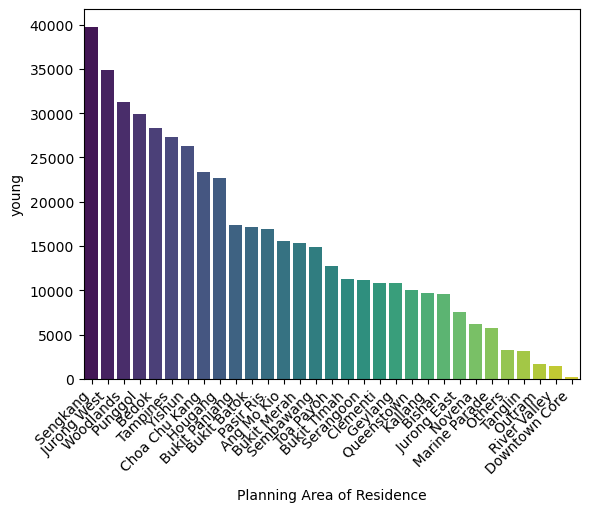

In [72]:
sns.barplot(data=stugeo, x=stugeo['Planning Area of Residence'], y=stugeo['young'], palette="viridis")
plt.xticks(rotation=45, ha="right")